# Initial Model

Load the dataset

In [1]:
import pandas as pd

df = pd.read_csv("data/pima-indians-diabetes.csv")
dataset = df.values

Split the dataset into features (x) and labels (y)

In [18]:
X = dataset[:,0:8]
y = dataset[:,8]

Split the dataset into training and testing sets

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


Standardize the features

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Create the neural network model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu')),
model.add(Dense(units=8, activation='relu')),
model.add(Dense(units=1, activation='sigmoid'))

# Specify the optimizer
optimizer = Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Fit the model

In [22]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6385 - loss: 0.6226 - val_accuracy: 0.6935 - val_loss: 0.5498
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7498 - loss: 0.4854 - val_accuracy: 0.7097 - val_loss: 0.5049
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8117 - loss: 0.4252 - val_accuracy: 0.7258 - val_loss: 0.5496
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7675 - loss: 0.4619 - val_accuracy: 0.7097 - val_loss: 0.5042
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7846 - loss: 0.4177 - val_accuracy: 0.6935 - val_loss: 0.5114
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8183 - loss: 0.4102 - val_accuracy: 0.7097 - val_loss: 0.5247
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8181 - loss: 0.3947 - val_accuracy: 0.6935 - val_loss: 0.5209
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.4137 - val_accuracy: 0.7581 - v

Evaluate the model

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6795 - loss: 2.8681 
Test loss: 2.9777297973632812
Test accuracy: 0.6688311696052551


Plot the training & validation loss

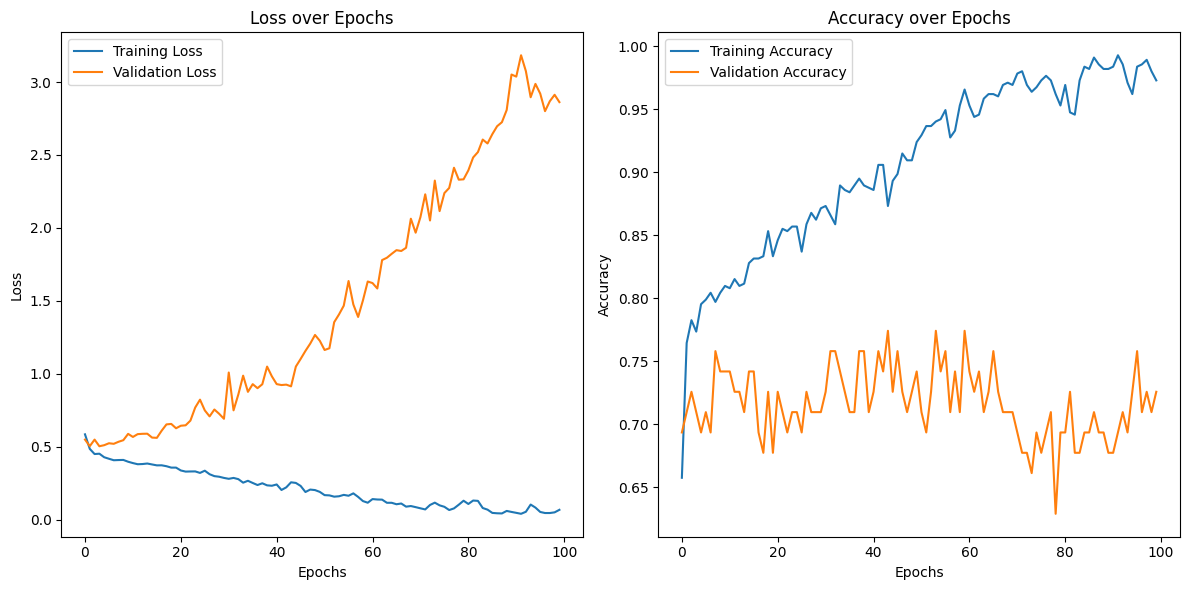

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
# Save the model
model.save('models/initial.keras')